In [63]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.integrate import simps
import matplotlib.ticker as ticker

In [2]:
import numpy as np
from scipy import interpolate


def dvr(r, e, mu, interp=False):
    """
    Discrete Value Representation (DVR) 1-Dimensional

        r   : (array) potential surface position values
        e   : (array) potential surface energy values
        mu  : (float) reduce mass
    """

    if interp:
        cs = interpolate.CubicSpline(r, e)
        r_new = np.linspace(r[0], r[-1], 500)
        e_new = cs(r_new)

        r = r_new
        e = e_new

    N = len(r)
    mp = (r[1] - r[0])

    H = np.ndarray((N,N), dtype="float")

    for i in range(N):
        for j in range(N):
            if(i == j):
                H[i][j] = (1 / (2 * mu * mp**2)) * (np.pi**2 / 3) + e[i]

            else:
                H[i][j] = (-1)**(i - j) * (1 / (2 * mu * mp**2)) * (2/ (i-j)**2)

    Ev, eigvec = np.linalg.eigh(H)
    Cv = eigvec.transpose()
    
    return [r, e, Cv, Ev]

In [3]:
data_0 = np.loadtxt('test/n2_gs.txt', delimiter=',')
data_g = np.loadtxt('test/n2_ex_g.txt', delimiter=',')
data_u = np.loadtxt('test/n2_ex_u.txt', delimiter=',')

r_0 = data_0[:, 0] * 1.88973
e_0 = data_0[:, 1]

r_g = data_g[:, 0] * 1.88973
e_g = data_g[:, 1]

r_u = data_u[:, 0] * 1.88973
e_u = data_u[:, 1]

mu = (25526.042373971035 * 25526.042373971035) / (2*25526.042373971035)

r_0, e_0, Cv_0, Ev_0 = dvr(r_0, e_0, mu, interp=True)
r_g, e_g, Cv_g, Ev_g = dvr(r_g, e_g, mu, interp=True)
r_u, e_u, Cv_u, Ev_u = dvr(r_u, e_u, mu, interp=True)

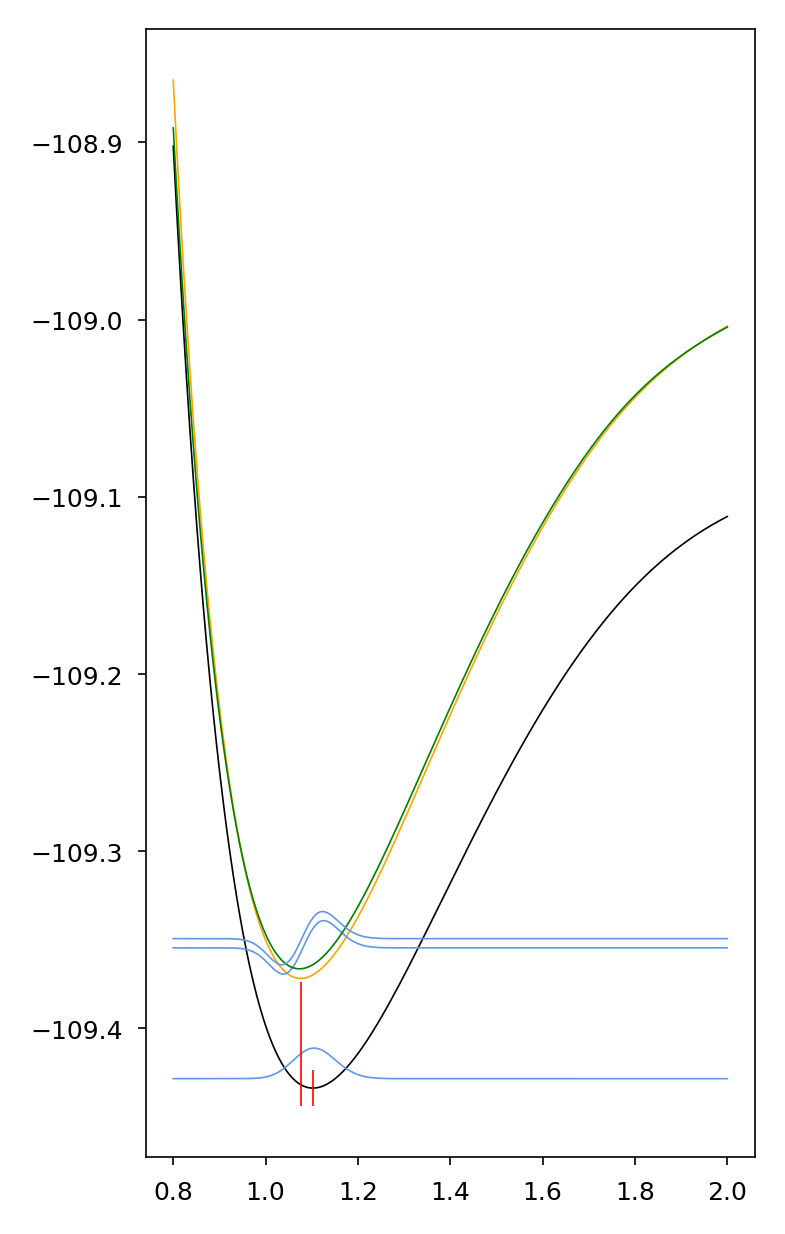

In [84]:
plt.rcParams.update({'font.size': 6})
plt.rcParams['axes.linewidth'] = 0.4
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.major.width'] = 0.4
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.major.width'] = 0.4
plt.rcParams['ytick.minor.size'] = 1
plt.rcParams['ytick.minor.width'] = 0.2

n = 1

sf = 0.1
shift_plot = -15

fig = plt.figure(figsize=(2.5, 4), dpi=300)
gs = GridSpec(1, 1)

###################################################################################
#----------------------------------------------------------------------------------
# Plot 1: Ground State
#----------------------------------------------------------------------------------
###################################################################################

ax1 = fig.add_subplot(gs[0])
ax1.plot(r_0 / 1.88973, e_0, linewidth=0.4, color='k')
ax1.plot(r_0 / 1.88973, sf * Cv_0[0] + Ev_0[0], linewidth=0.4, color='cornflowerblue')

ax1.plot(r_g / 1.88973, e_g + shift_plot, linewidth=0.4, color='orange')
ax1.plot(r_g / 1.88973, sf * Cv_g[n] + Ev_g[n] + shift_plot, linewidth=0.4, color='cornflowerblue')

ax1.plot(r_u / 1.88973, e_u + shift_plot, linewidth=0.4, color='green')
ax1.plot(r_u / 1.88973, sf * Cv_u[n] + Ev_u[n] + shift_plot, linewidth=0.4, color='cornflowerblue')


ax1.vlines(r_g[np.argmin(e_0)] / 1.88973, np.min(e_0) - 0.01, np.min(e_0) + 0.01, colors='r', linewidths=0.4)
ax1.vlines(r_g[np.argmin(e_g)] / 1.88973, np.min(e_0) - 0.01, np.min(e_0) + 0.06, colors='r', linewidths=0.4)

# Axis Labels and Limits
#----------------------------------------------------------------------------------

fig.align_ylabels()
plt.tight_layout(pad=0.5)
plt.show()

In [111]:
def moorse(r, D=1, a=1, re=1, y=0):
    y = D * (1-np.exp(-a * (r-re) ))**2 + y
    return y

In [141]:
De_g = 67887.4285714286 * (1 / 219474.63)
re_g = r_g[np.argmin(e_g)]
a_g = 1.6

r_mor_start = r_g[0]
r_mor_end = 5

r_mor = np.linspace(r_mor_start, r_mor_end, 500)
e_mor = moorse(r_mor, D=De_g, a=a_g, re=re_g, y=np.min(e_g))

r_mor, e_mor, Cv_mor, Ev_mor = dvr(r_mor, e_mor, mu, interp=False)

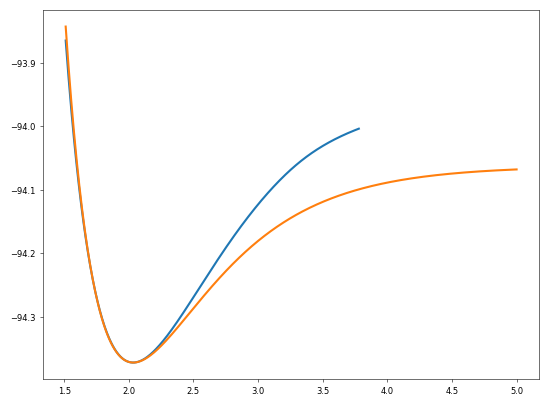

In [140]:
plt.plot(r_g, e_g)
plt.plot(r_mor, e_mor)

(0.8, 1.4)

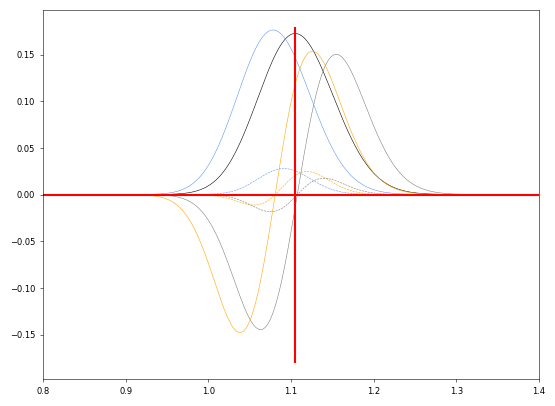

In [40]:
plt.plot(r_0 / 1.88973, Cv_0[0], linewidth=0.4, color='k')
plt.plot(r_0 / 1.88973, Cv_0[1], linewidth=0.4, color='gray')
plt.plot(r_g / 1.88973, Cv_g[0], linewidth=0.4, color='cornflowerblue')
plt.plot(r_g / 1.88973, Cv_g[1], linewidth=0.4, color='orange')

plt.plot(r_g / 1.88973, Cv_0[0] * Cv_g[0], linewidth=0.4, color='cornflowerblue', linestyle="--")
plt.plot(r_g / 1.88973, Cv_0[0] * Cv_g[1], linewidth=0.4, color='orange', linestyle="--")
plt.plot(r_g / 1.88973, Cv_0[0] * Cv_0[1], linewidth=0.4, color='gray', linestyle="--")

plt.hlines(0, 0, 2, color='r')
plt.vlines(r_g[np.argmax(Cv_0[0])] / 1.88973, -0.18, 0.18, color='r')

plt.xlim(0.8, 1.4)

In [6]:
def franck_condon_factors(r, wfn_0, wfn_v):
    """ 
    Compute Franck-Condon factors from two vibrational wavefunction overlap

        wfn_0 : (array) vibrational wavefunction
        wfn_v : (array) vibrational wavefunction
    """
    N0 = np.sqrt(simps(wfn_0 * wfn_0, r))
    Nv = np.sqrt(simps(wfn_v * wfn_v, r))

    prod = wfn_0 / N0 * wfn_v / Nv
    fc = simps(prod, r)

    return fc

In [142]:
S00 = franck_condon_factors(r_0, Cv_0[0], Cv_mor[0])
S01 = franck_condon_factors(r_0, Cv_0[0], Cv_mor[1])

S00u = franck_condon_factors(r_0, Cv_0[0], Cv_u[0])
S01u = franck_condon_factors(r_0, Cv_0[0], Cv_u[1])


E00 = 0
E01 = 1

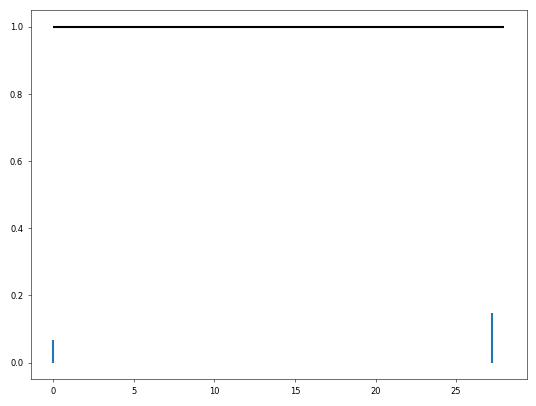

In [143]:
plt.vlines(np.array([E00, E01]) * 27.2114, [0,0], [S00, S01])
plt.hlines(1, 0, 28, color='k')

(0.0, 1.6)

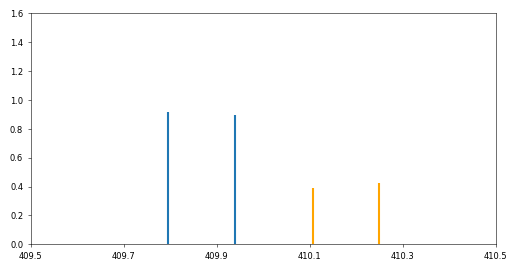

In [77]:
plt.figure(figsize=(6, 3))

gshift = -((Ev_u[0] - Ev_0[0]) * 27.2114  - 409.9) + 0.04

plt.vlines((Ev_g[0] - Ev_0[0]) * 27.2114 + gshift, 0, S00)
plt.vlines((Ev_u[0] - Ev_0[0]) * 27.2114 + gshift, 0, S00u)

plt.vlines((Ev_g[1] - Ev_0[0]) * 27.2114 + gshift, 0, S01, colors='orange')
plt.vlines((Ev_u[1] - Ev_0[0]) * 27.2114 + gshift, 0, S01u, colors='orange')

plt.gca().xaxis.set_ticks([409.5, 409.7, 409.9, 410.1, 410.3, 410.5])

plt.xlim(409.5, 410.5)
plt.ylim(0, 1.6)

0.02885771543086177